# [**Démonstration des hypothèses de k-moyennes**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_3_cluster/plot_kmeans_assumptions.ipynb)<br/>([_Demonstration of k-means assumptions_](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html))

Cet exemple vise à illustrer les situations où les k-moyennes produisent des grappes non intuitives et potentiellement indésirables.

```python
# Auteur : Phil Roth <mr.phil.roth@gmail.com>
#         Arturo Amor <david-arturo.amor-quiroz@inria.fr>
# Licence : BSD 3 clauses

# Génération de données

La fonction [**`make_blobs`**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) génère des grappes gaussiennes isotropes (sphériques). Pour obtenir des grappes gaussiennes anisotropes (elliptiques), il faut définir une `transformation` linéaire.

In [1]:
import numpy as np

from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Grappes anisotropes
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Variance inégale
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Grappes de tailles inégales
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

Nous pouvons visualiser les données résultantes :

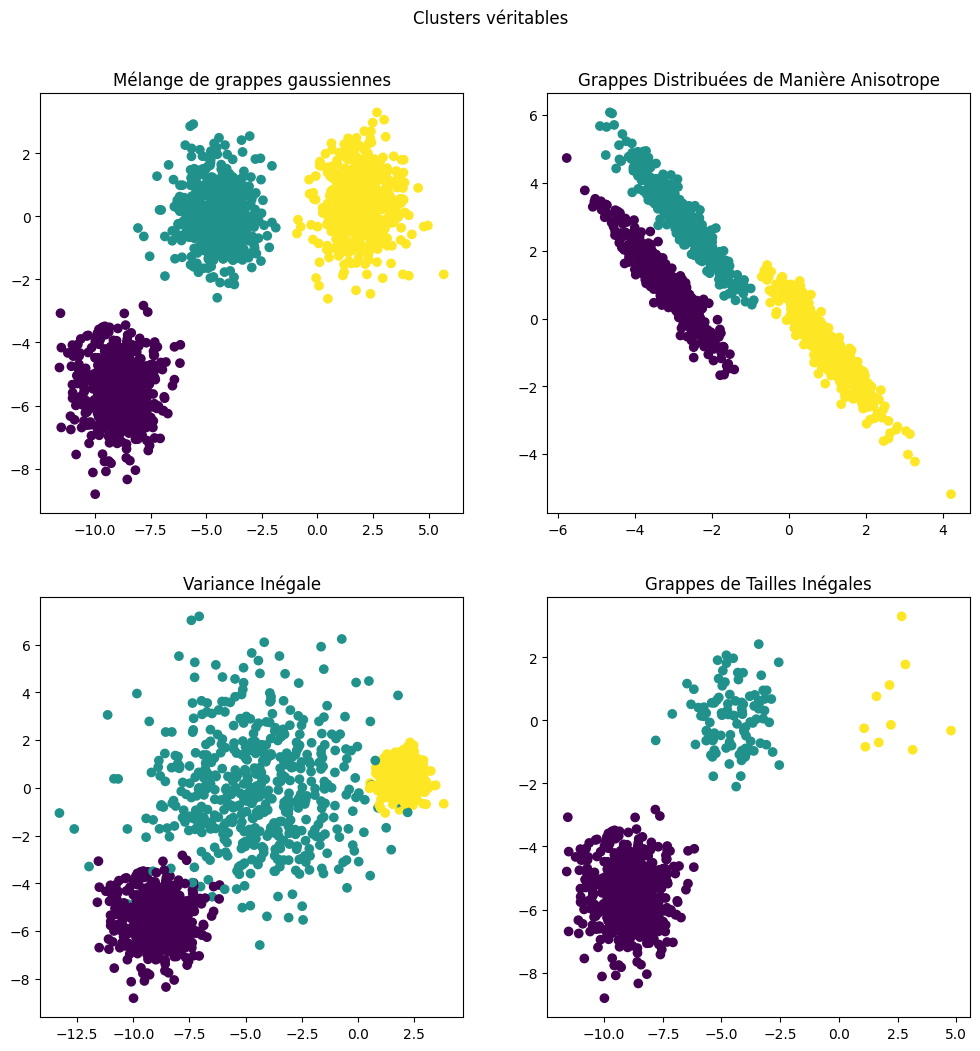

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mélange de grappes gaussiennes")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Grappes Distribuées de Manière Anisotrope")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Variance Inégale")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Grappes de Tailles Inégales")

plt.suptitle("Clusters véritables").set_y(0.95)
plt.show()

# Modèles ajustés et résultats tracés

Les données précédemment générées sont maintenant utilisées pour montrer comment [**`KMeans`**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) se comporte dans les scénarios suivants :

- Nombre non optimal de grappes : dans un contexte réel, il n'y a pas de nombre **vrai** de grappes défini de manière unique. Un nombre approprié de grappes doit être décidé à partir de critères basés sur les données et de la connaissance de l'objectif visé.
- Grappes distribuées de manière anisotrope : les k-moyennes consistent à minimiser les distances euclidiennes des échantillons au centroïde de la grappe à laquelle ils sont attribués. En conséquence, les k-moyennes conviennent davantage aux grappes qui sont isotropes et suivent une distribution normale (c'est-à-dire des gaussiennes sphériques).
- Variance inégale : les k-moyennes sont équivalentes à l'estimateur de maximum de vraisemblance pour un "mélange" de k distributions gaussiennes avec les mêmes variances mais éventuellement des moyennes différentes.
- Grappes de tailles inégales : il n'y a pas de résultat théorique sur les k-moyennes indiquant qu'elles nécessitent des tailles de grappes similaires pour bien fonctionner, cependant, minimiser les distances euclidiennes signifie que plus le problème est dispersé et de grande dimension, plus il est nécessaire d'exécuter l'algorithme avec différentes amorces de centroïdes pour garantir une inertie minimale globale.

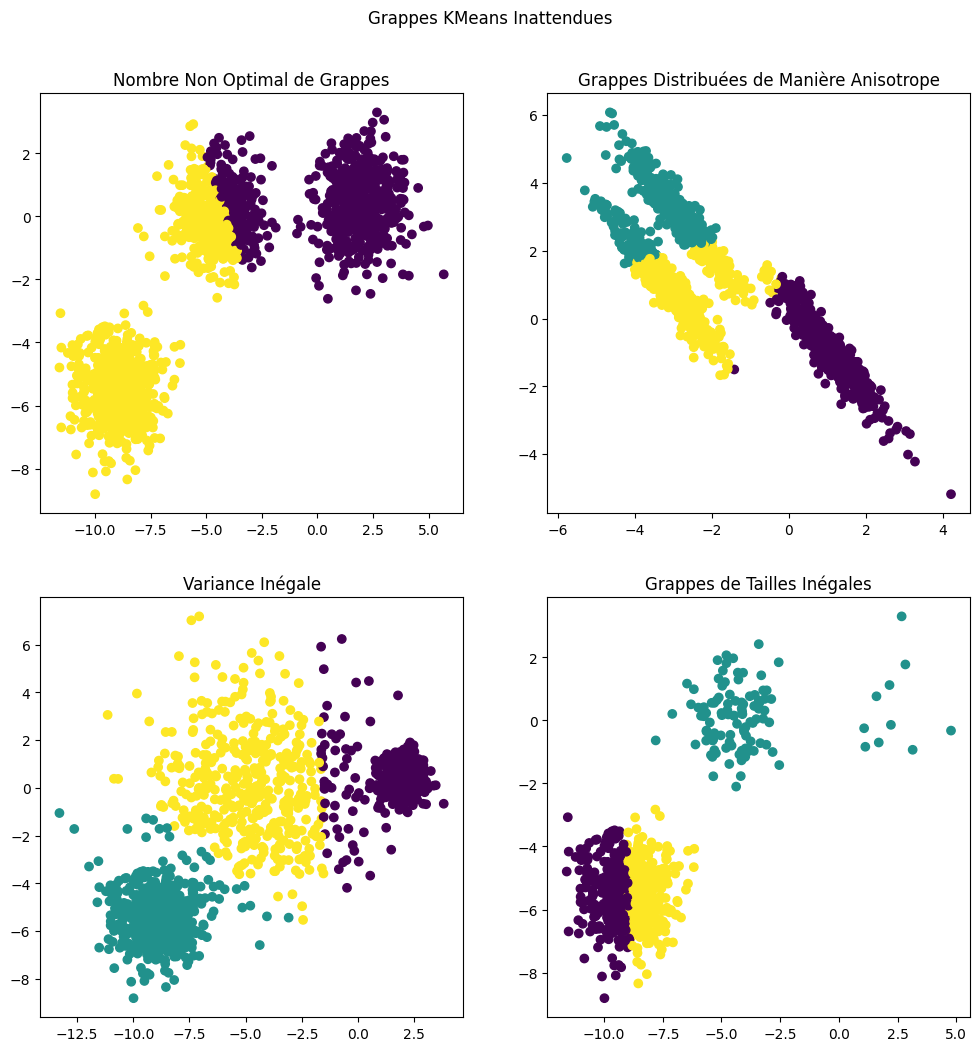

In [3]:
from sklearn.cluster import KMeans

parametres_communs = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = KMeans(n_clusters=2, **parametres_communs).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Nombre Non Optimal de Grappes")

y_pred = KMeans(n_clusters=3, **parametres_communs).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Grappes Distribuées de Manière Anisotrope")

y_pred = KMeans(n_clusters=3, **parametres_communs).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Variance Inégale")

y_pred = KMeans(n_clusters=3, **parametres_communs).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Grappes de Tailles Inégales")

plt.suptitle("Grappes KMeans Inattendues").set_y(0.95)
plt.show()

# Solutions Possibles

Pour un exemple de détermination d'un nombre correct de grappes, consultez [**Sélection du nombre de grappes avec une analyse de silhouette sur le regroupement KMeans**](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py). Dans ce cas, il suffit de définir `n_clusters=3`.

In [ ]:
y_pred = KMeans(n_clusters=3, **parametres_communs).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Nombre Optimal de Grappes")
plt.show()

Pour traiter des grappes de tailles inégales, on peut augmenter le nombre d'initialisations aléatoires. Dans ce cas, nous définissons `n_init=10` pour éviter de trouver un minimum local sous-optimal. Pour plus de détails, consultez [**Regroupement de données clairsemées avec les k-moyennes**](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#kmeans-sparse-high-dim).

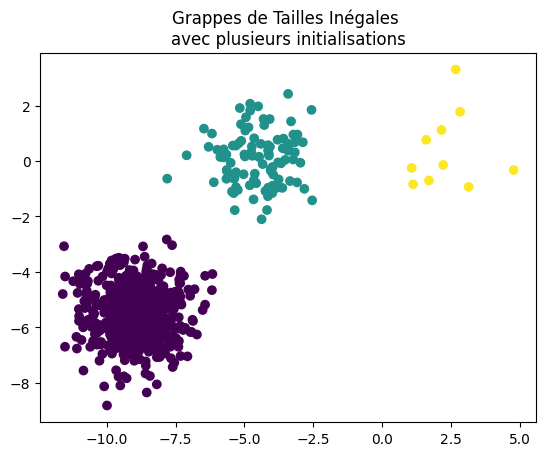

In [4]:
y_pred = KMeans(n_clusters=3, n_init=10, random_state=random_state).fit_predict(
    X_filtered
)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Grappes de Tailles Inégales \navec plusieurs initialisations")
plt.show()

Comme l'anisotropie et les variances inégales sont des limitations réelles de l'algorithme des k-moyennes, nous proposons à la place l'utilisation de [**`GaussianMixture`**](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html), qui suppose également des grappes gaussiennes mais n'impose aucune contrainte sur leurs variances. Remarquez qu'il faut toujours trouver le nombre correct de grappes (voir [**Sélection du modèle de mélange gaussien**](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py)).

Pour un exemple de la manière dont d'autres méthodes de regroupement traitent les grappes anisotropes ou à variance inégale, consultez l'exemple [**Comparaison de différentes algorithmes de regroupement sur des jeux de données factices**](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py).

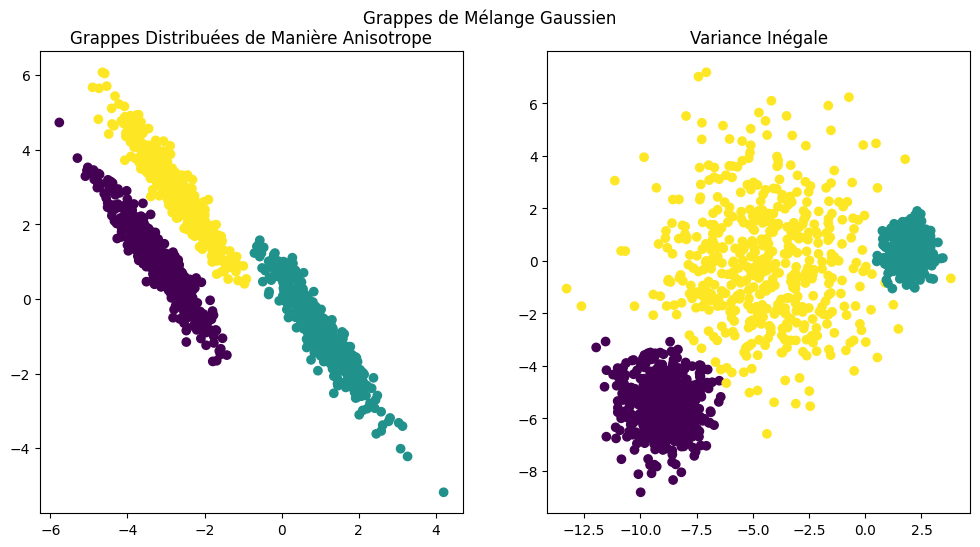

In [5]:
from sklearn.mixture import GaussianMixture

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_pred = GaussianMixture(n_components=3).fit_predict(X_aniso)
ax1.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
ax1.set_title("Grappes Distribuées de Manière Anisotrope")

y_pred = GaussianMixture(n_components=3).fit_predict(X_varied)
ax2.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
ax2.set_title("Variance Inégale")

plt.suptitle("Grappes de Mélange Gaussien").set_y(0.95)
plt.show()

# Remarques Finales

Dans les espaces de grande dimension, les distances euclidiennes ont tendance à être gonflées (ce qui n'est pas montré dans cet exemple). L'exécution d'un algorithme de réduction de dimensionnalité avant le regroupement k-moyennes peut atténuer ce problème et accélérer les calculs (voir l'exemple [**Regroupement de documents textuels à l'aide des k-moyennes**](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py)).

Dans le cas où les grappes sont connues pour être isotropes, avoir des variances similaires et ne pas être trop creuses, l'algorithme des k-moyennes est très efficace et est l'un des algorithmes de regroupement les plus rapides disponibles. Cet avantage est perdu si l'on doit le relancer plusieurs fois pour éviter la convergence vers un minimum local.